Data loaded successfully!
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7   

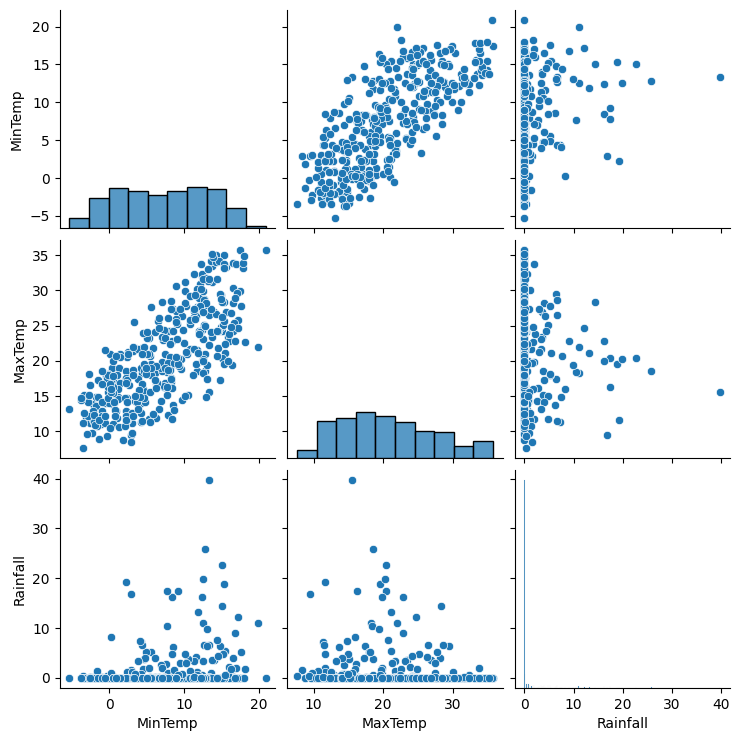

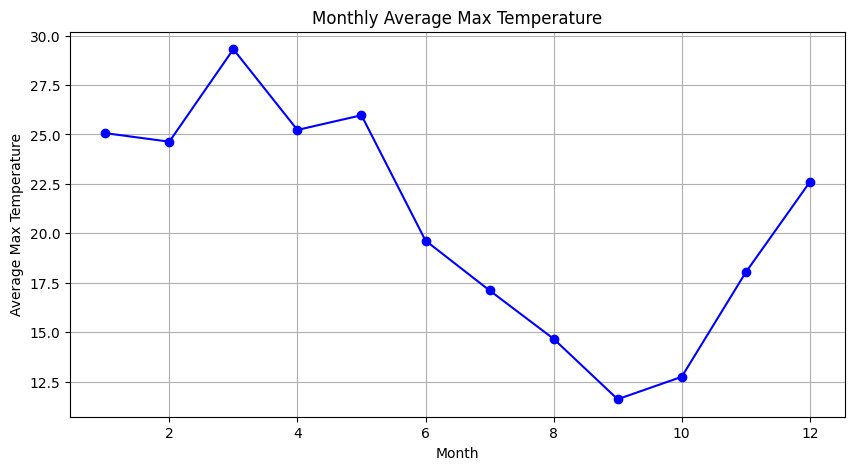

Mean Squared Error: 37.08
R² Score: 0.12
Highest Rainfall Month: 3
Lowest Rainfall Month: 9


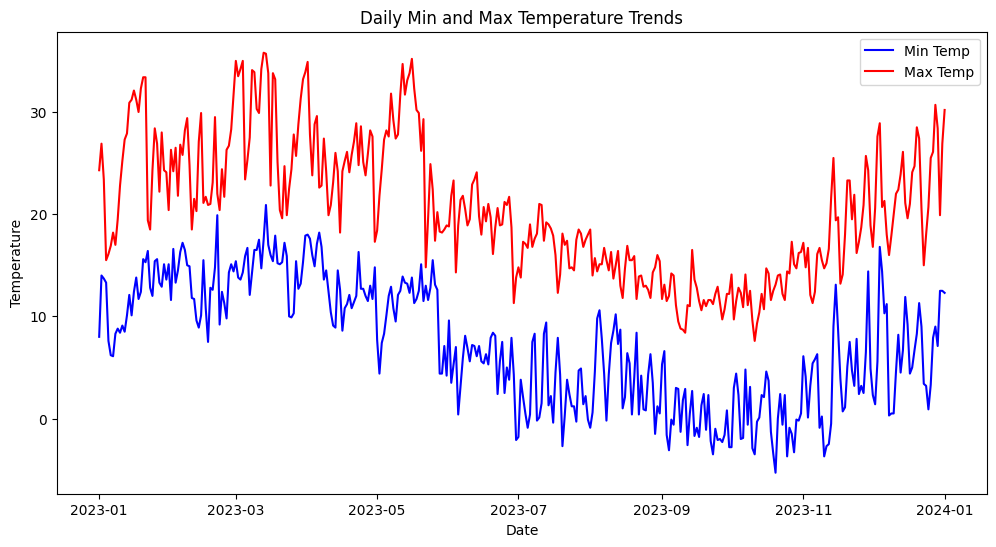

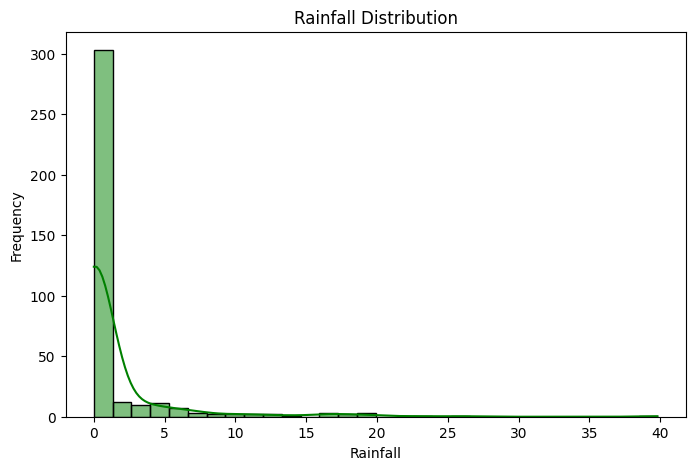

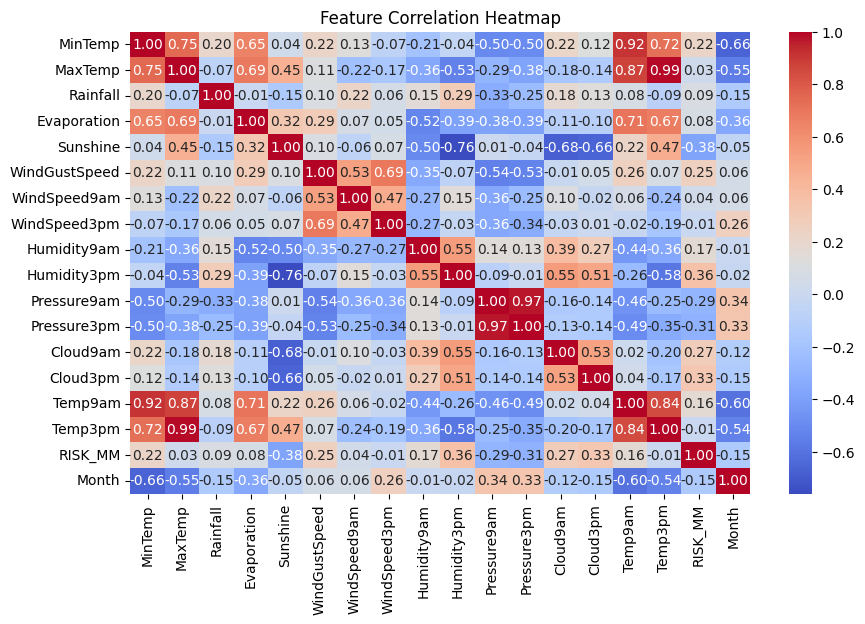

C:\Users\SRIJAN\AppData\Local\Temp\ipykernel_16956\791654264.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette='Blues')


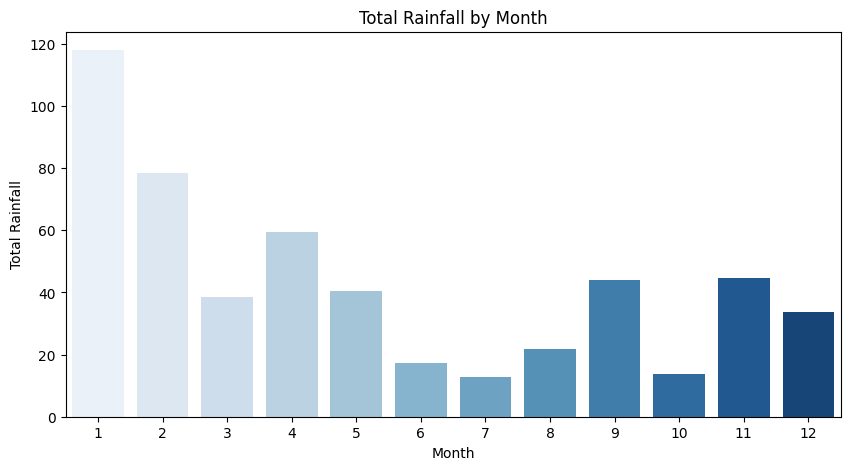

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Data
def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print("Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("Error: File not found.")
        return None

# Data Exploration
def explore_data(df):
    print(df.head())
    print(df.info())
    print(df.describe())

# Data Visualization
def visualize_data(df):
    sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
    plt.savefig("pairplot.png")
    plt.show()

# Feature Engineering
def process_data(df):
    df['Date'] = pd.date_range(start="2023-01-01", periods=len(df), freq='D')
    df['Month'] = df['Date'].dt.month
    return df

# Monthly Average Max Temperature
def analyze_temperature(df):
    monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o', linestyle='-', color='b')
    plt.xlabel('Month')
    plt.ylabel('Average Max Temperature')
    plt.title('Monthly Average Max Temperature')
    plt.grid(True)
    plt.savefig("monthly_avg_max_temp.png")
    plt.show()
    return monthly_avg_max_temp

# Rainfall Prediction Model
def train_rainfall_model(df):
    X = df[['MinTemp', 'MaxTemp']]
    y = df['Rainfall']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R² Score: {r2:.2f}')
    
    return model

# Future Work: Additional Visualizations
def additional_visualizations(df):
    # Temperature Trends Over Time
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['MinTemp'], label='Min Temp', color='blue')
    plt.plot(df['Date'], df['MaxTemp'], label='Max Temp', color='red')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Daily Min and Max Temperature Trends')
    plt.legend()
    plt.savefig("temperature_trends.png")
    plt.show()
    
    # Rainfall Distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Rainfall'], bins=30, kde=True, color='green')
    plt.xlabel('Rainfall')
    plt.ylabel('Frequency')
    plt.title('Rainfall Distribution')
    plt.savefig("rainfall_distribution.png")
    plt.show()
    
    # Correlation Heatmap — FIXED
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.savefig("correlation_heatmap.png")
    plt.show()
    
    # Monthly Rainfall Analysis
    monthly_rainfall = df.groupby('Month')['Rainfall'].sum()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette='Blues')
    plt.xlabel('Month')
    plt.ylabel('Total Rainfall')
    plt.title('Total Rainfall by Month')
    plt.savefig("monthly_rainfall.png")
    plt.show()

# Main Execution
def main():
    filepath = 'weather.csv'  # Update with your actual file path
    df = load_data(filepath)
    if df is not None:
        explore_data(df)
        visualize_data(df)
        df = process_data(df)
        monthly_avg_max_temp = analyze_temperature(df)
        model = train_rainfall_model(df)
        
        print(f'Highest Rainfall Month: {monthly_avg_max_temp.idxmax()}')
        print(f'Lowest Rainfall Month: {monthly_avg_max_temp.idxmin()}')
        
        # Future Work Visualizations
        additional_visualizations(df)

if __name__ == "__main__":
    main()
